In [1]:
import pandas as pd
import sklearn
from sklearn.manifold import TSNE
import gensim
import matplotlib.pyplot as plt


In [2]:
df_name = pd.read_csv("name.csv", sep = '/t', header = None)
df_syn = pd.read_csv("synonyms.csv",sep='/t', header = None)

/Users/sdbv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Users/sdbv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [3]:
def token(row,column_name):
    return gensim.utils.simple_preprocess(str(row[column_name]).encode('utf-8'))
#convert a document into a list of tokens.
   
name_data = []
syn_data = []

#for name 
for index, row in df_name.iterrows():
    name_data.append(token(row,0))
    
#for synonym
for index, row in df_syn.iterrows():
    syn_data.append(token(row,0))

In [4]:
model = gensim.models.Word2Vec(size=150, window=10, min_count=2, sg=1, workers=10)
model.build_vocab(syn_data)  # prepare the model vocabulary

In [5]:
##Train the model
model.train(sentences=syn_data, total_examples=len(syn_data), epochs=model.iter)

/Users/sdbv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `iter` (Attribute will be removed in 4.0.0, use self.epochs instead).
  


(1622475, 2214665)

In [6]:
word_vectors = model.wv
count = 0
for word in word_vectors.vocab:
    if count<200:
        print(word)
        count += 1
    else:
        break

fenchanone
fenchan
one
fenchone
heptan
alkyl
acylglycerols
acyl
sn
glycerol
alpha
ohe
hydroxyestrone
dihydroxyestra
trien
dihydroxy
estratrien
estra
triene
diol
dbn
dichlorobenzoic
acid
nitrile
dichlorophenyl
cyanide
dcb
dichlobanil
dichlobenil
hydroxybutanoic
hydroxybutyric
octaprenyl
hydroxyphenol
all
trans
benzene
polyprenyl
phenol
beta
cholest
ene
ohc
oxo
steroid
steroids
hydroxy
delta
hydroxymethyl
toluene
methylbenzyl
alcohol
tolylcarbinol
xylene
tolyl
amino
aminoimidazole
carboxamide
xylosyl
glucoside
xylopyranosyl
glucopyranoside
dma
galangin
dimethyl
allyl
trihydroxy
phenyl
chromen
dimethylallyl
aba
abscisic
apo
epsilon
caroten
oic
cis
abscisin
ii
acarbose
precose
acycloguanosine
ethyl
adenine
adefovir
drg
gs
hsdb
pmea
biapigenin
benzopyran
yl
hydroxyphenyl
didemethyl
ginkgetin
diamino
carbamimidoyl
chloropyrazine
amiloride
amidino
acetyl
thia
azabicyclo
heptane
carboxylic
penicillanic
ax
amoxicillin
anhydrous
amoxycilin
amoxycillin
amph
amphotericine
liposomal
amphotericin
hy

In [7]:
len(word_vectors.vocab)


15498

In [8]:
vector = model.wv['benzene']
vector

array([ 0.17103077,  0.3512448 , -0.07196797, -0.3716307 ,  0.05172082,
       -0.35257638, -0.22907574, -0.06236904,  0.31472677,  0.25618348,
        0.15019368, -0.12547746, -0.49360678,  0.6628348 ,  0.41235813,
       -0.26459393, -0.31121156, -0.26465952,  0.2435954 , -0.3926848 ,
        0.06202476, -0.00403684, -0.37646103, -0.45510393,  0.09802049,
        0.12953179, -0.4277663 , -0.07262878, -0.5513813 ,  0.04087565,
       -0.5819897 ,  0.0623256 , -0.20544752,  0.06740367, -0.09982999,
        0.27458632, -0.09734709, -0.04062012,  0.00179631,  0.38163364,
        0.09649439,  0.7640048 , -0.23380263,  0.2716629 ,  0.31752044,
       -0.4714481 , -0.40466186,  0.15616013, -0.20467402,  0.36419353,
        0.18343672, -0.2988548 , -0.04433468, -0.5869772 ,  0.15221012,
       -0.33370358, -0.6200874 ,  0.10170949, -0.2362235 , -0.09247809,
       -0.07605001,  0.01046763, -0.2178698 ,  0.47115365,  0.07177694,
       -0.27433732, -0.4129527 , -0.23794393, -0.26755384, -0.21

In [9]:
#Create a two-dimensional semantic representation of word embeddings using t-Distributed Stochastic Neighbor Embedding (t-SNE).
wanted_words = []
count = 0
for word in word_vectors.vocab:
    if count<500:
        wanted_words.append(word)
        count += 1
    else:
        break
wanted_vocab = dict((k, word_vectors.vocab[k]) for k in wanted_words if k in word_vectors.vocab)
wanted_vocab


{'fenchanone': <gensim.models.keyedvectors.Vocab at 0x1a1bf01358>,
 'fenchan': <gensim.models.keyedvectors.Vocab at 0x1a1bf015f8>,
 'one': <gensim.models.keyedvectors.Vocab at 0x1a1bf01588>,
 'fenchone': <gensim.models.keyedvectors.Vocab at 0x1a1bf01e10>,
 'heptan': <gensim.models.keyedvectors.Vocab at 0x1a1bf01748>,
 'alkyl': <gensim.models.keyedvectors.Vocab at 0x1a1bf01470>,
 'acylglycerols': <gensim.models.keyedvectors.Vocab at 0x1a1bf014a8>,
 'acyl': <gensim.models.keyedvectors.Vocab at 0x1a1bf01390>,
 'sn': <gensim.models.keyedvectors.Vocab at 0x1a1bf013c8>,
 'glycerol': <gensim.models.keyedvectors.Vocab at 0x1a1bf01400>,
 'alpha': <gensim.models.keyedvectors.Vocab at 0x1a1bf016a0>,
 'ohe': <gensim.models.keyedvectors.Vocab at 0x1a1bf01710>,
 'hydroxyestrone': <gensim.models.keyedvectors.Vocab at 0x1a1bf016d8>,
 'dihydroxyestra': <gensim.models.keyedvectors.Vocab at 0x1a1f216f98>,
 'trien': <gensim.models.keyedvectors.Vocab at 0x1a1f14fbe0>,
 'dihydroxy': <gensim.models.keyedvect

In [10]:
X = model[wanted_vocab] # X is an array of word vectors, each vector containing 150 tokens
tsne_model = TSNE(perplexity=40, n_components=2, init="pca", n_iter=10000, random_state=23)
Y = tsne_model.fit_transform(X)
tsne_model

/Users/sdbv/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


TSNE(angle=0.5, early_exaggeration=12.0, init='pca', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=10000, n_iter_without_progress=300, perplexity=40,
     random_state=23, verbose=0)

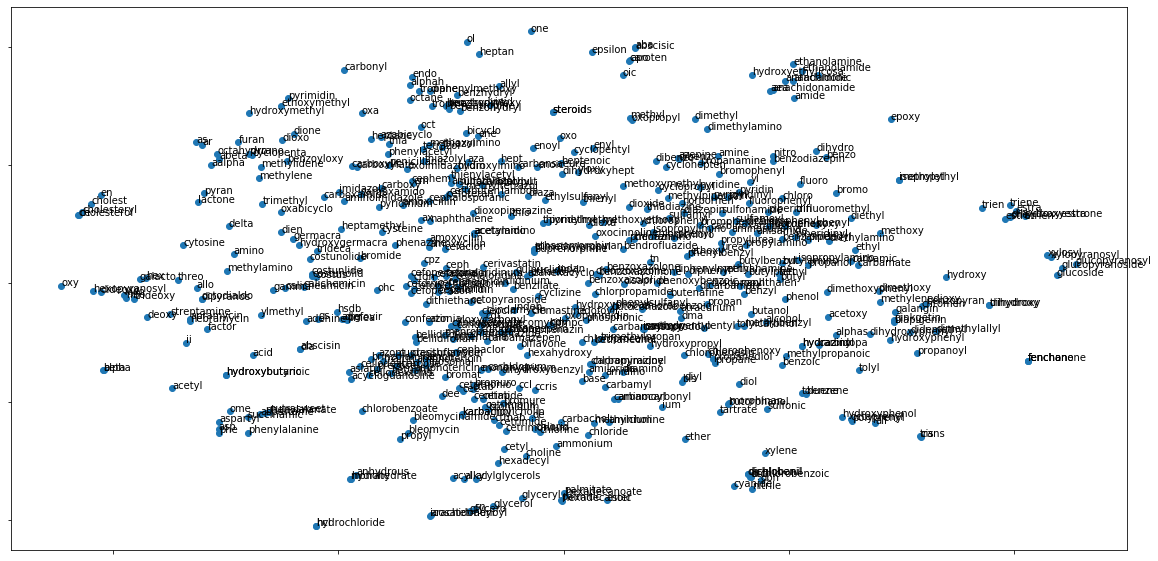

In [11]:
#Plot the t-SNE output
fig, ax = plt.subplots(figsize=(20,10))
ax.scatter(Y[:, 0], Y[:, 1])
words = list(wanted_vocab)
for i, word in enumerate(words):
    plt.annotate(word, xy=(Y[i, 0], Y[i, 1]))
ax.set_yticklabels([]) #Hide ticks
ax.set_xticklabels([]) #Hide ticks
plt.show()

In [12]:
#Playing with the trained Word2Vec model

w1 = "water"
model.wv.most_similar(positive=w1, topn=20)


[('wasser', 0.9322637319564819),
 ('acqua', 0.8734434843063354),
 ('agua', 0.8657115697860718),
 ('bound', 0.8651385307312012),
 ('caustic', 0.8543241024017334),
 ('hoh', 0.8535779714584351),
 ('scopolaminium', 0.8520039916038513),
 ('pentahydrate', 0.8509237766265869),
 ('soluble', 0.8485721945762634),
 ('cdcl', 0.8424271941184998),
 ('hydroxyde', 0.8421833515167236),
 ('scopolammonium', 0.8417909145355225),
 ('barium', 0.8415676355361938),
 ('anh', 0.8411014080047607),
 ('alo', 0.8394312262535095),
 ('vanadate', 0.8382976651191711),
 ('trioxido', 0.8379743099212646),
 ('eosin', 0.8372491598129272),
 ('chlorate', 0.8371174335479736),
 ('aqua', 0.8349598050117493)]

In [13]:
#find odd item in a list
model.wv.doesnt_match(["water","benzene","soluble", "acqua"])


/Users/sdbv/anaconda3/lib/python3.7/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'benzene'

In [14]:
#save the model for futue use
model.wv.save_word2vec_format('model.bin')